# Checking truncation with TBG at large angles

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import time

In [3]:
sys.path.append("../src")
import numpy as np
from geometry import get_tbg_unit_cell, TBGGeom
from hamiltonians import tbg_k_hamiltonian, tbg_neighbor_cell_hamiltonian
from tb import high_symmetry_path

# Okay let's gut check the band structure for small angles...

In [6]:
geom = TBGGeom(d=1, m=2)
Npts = 10
ktargets = [geom.K, geom.Gamma, geom.M, geom.K]
kpts, dkpts = high_symmetry_path(ktargets, Npts)

In [12]:
start = time.time()
HR, Ts = tbg_neighbor_cell_hamiltonian(m=geom.m, d=geom.d, t=1.)
Hk = tbg_k_hamiltonian(kpts=kpts, m=geom.m, HR=HR, Ts=Ts)
print(time.time() - start)
#evals = np.linalg.eigvalsh(Hk)

2.994354248046875


In [16]:
start = time.time()
for i in range(len(kpts)):
    Hk = tbg_k_hamiltonian(kpts=[kpts[i]], m=geom.m)
print(time.time() - start)

KeyboardInterrupt: 

In [ ]:
Hk = tbg_k_hamiltonian(kpts=[kpts[i]]

In [28]:
Hk.nbytes * 1.e-6

2268.807424

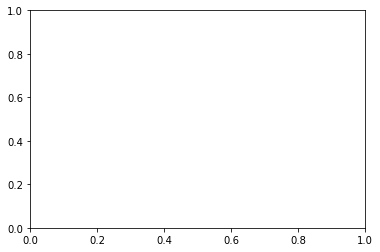

In [36]:
for m in [3,5,7,9,11]:
    geom = Geom(d=1, m=m)
    Npts = 10
    ktargets = [geom.K, geom.Gamma, geom.M, geom.K]
    kpts, dkpts = high_symmetry_path(ktargets, Npts)


    Hk = tbg_k_hamiltonian(kpts=kpts, m=geom.m, batched=True)
    evals = np.linalg.eigvalsh(Hk)

    plt.plot(dkpts, evals[1:]);
    plt.xticks(dkpts[::Npts-1], labels=["K", "Gamma", "M", "K"])
    plt.ylim(-.25, .25)
    plt.xlabel("k path", fontsize=14)
    plt.ylabel("Energy (eV)", fontsize=14)
    plt.title(f"m={geom.m}", fontsize=20)
    plt.savefig(f"img/tbg_bs_m{geom.m}.png", dpi=150)
    plt.cla()
    # lgtm

In [36]:
Hk.shape

(61, 676, 676)

# Now we do on a mesh

In [ ]:
geom = Geom(d=1, m=7)
Ncells = (4,4)
N = np.prod(Ncells)
ks = get_kpt_mesh(Ncells, geom.b.T, shift=None)

In [ ]:

H, basis, T = mlg_hamiltonian(Ncells, geom.a, t=1)
T = T.reshape(N, 2)

chik = get_bloch_wavefunction(ks, T, basis)
Hk = np.einsum("kim,ij,kjn->kmn", chik.conj(), H, chik)
evals = np.linalg.eigvalsh(Hk)
ediff = np.diff(evals, axis=1).squeeze()

H = H.reshape((np.prod(Ncells)*2, np.prod(Ncells)*2))
Px = get_momentum_operator(chik, ks[:,0])
Py = get_momentum_operator(chik, ks[:,1])